In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('newest_college_ycc.csv')
data.head()

,Unnamed: 0,team,state,rank,rating,division,region,section,num_ycc,num_total,ycc_percentage,ycc_years,ycc_names,ycc_locations
0,0,North Carolina (Darkside),North Carolina,1.0,2340.0,Division I,Atlantic Coast,Carolina DI,18,27,0.666667,58,"['ben dameron', 'jayden feagans', 'mukil gurup...","['Atlanta, Georgia', 'Charlotte, North Carolin..."
1,1,Washington (Sundodgers),Washington,2.0,2291.0,Division I,Northwest,Cascadia DI,15,28,0.535714,37,"['dana cameron baker', 'chackgarin brown', 'lu...","['Seattle, Washington', 'Seattle, Washington',..."
2,2,Cal Poly-SLO (SLOCORE),California,3.0,2194.0,Division I,Southwest,SoCal DI,13,23,0.565217,37,"['calvin brown', 'jeremy dolezal-ng', 'emmet h...","['San Diego, California', 'San Francisco Bay A..."
3,3,Brigham Young (CHI),Utah,4.0,2190.0,Division I,Northwest,Big Sky DI,2,20,0.100000,2,"['taylor barton', 'jordan kerr']","['Spearfish, South Dakota', 'Spearfish, South ..."
4,4,Colorado (Mamabird),Colorado,5.0,2169.0,Division I,South Central,Rocky Mountain DI,22,27,0.814815,56,"['mathieu agee', 'atkin arnstein', 'alex atkin...","['Nashville, Tennessee', 'Seattle, Washington'..."


In [3]:
data.shape[0]

389

In [4]:
ycc_df = data.dropna()
ycc_df.replace({'GA': 'Georgia', 'D.C.': 'District of Columbia'}, inplace = True)
ycc_df.shape[0]

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


371

In [5]:
cc = np.corrcoef(ycc_df['rank'], ycc_df['ycc_percentage'])[0,1]
print(cc)
print('r-squared value is:', cc**2)


-0.5839827944239014
r-squared value is: 0.3410359041831487


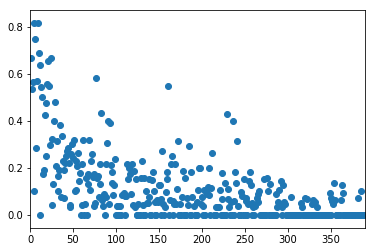

In [6]:
plt.scatter(ycc_df['rank'], ycc_df['ycc_percentage'])
plt.xlim(left = 0, right = 390)
plt.show()

In [7]:
top_50 = ycc_df[ycc_df['rank']<=50]

In [8]:
cc_50 = np.corrcoef(top_50['rank'], top_50['ycc_percentage'])[0,1]
print(cc_50)
print('r-squared value is:', cc_50**2)

-0.5837559129344594
r-squared value is: 0.34077096588594413


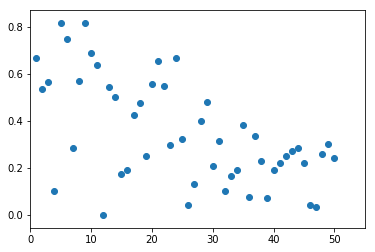

In [9]:
plt.scatter(top_50['rank'], top_50['ycc_percentage'])
plt.xlim(left = 0, right = 55)
plt.show()

In [10]:
ycc_df.max(axis = 0)

Unnamed: 0                                388
team              Yale-B (Friends of Gravity)
state                               Wisconsin
rank                                      389
rating                                   2340
division                         Division III
region                              Southwest
section                Western Southeast DIII
num_ycc                                    22
num_total                                  48
ycc_percentage                       0.814815
ycc_years                                  58
ycc_names                                  []
ycc_locations                              []
dtype: object

In [11]:
ycc_df.loc[ycc_df['ycc_percentage'] > .8]

,Unnamed: 0,team,state,rank,rating,division,region,section,num_ycc,num_total,ycc_percentage,ycc_years,ycc_names,ycc_locations
4,4,Colorado (Mamabird),Colorado,5.0,2169.0,Division I,South Central,Rocky Mountain DI,22,27,0.814815,56,"['mathieu agee', 'atkin arnstein', 'alex atkin...","['Nashville, Tennessee', 'Seattle, Washington'..."
8,8,Pittsburgh (En Sabah Nur),Pennsylvania,9.0,2052.0,Division I,Ohio Valley,West Penn DI,22,27,0.814815,58,"['dillon garrett', 'dan goldstein', 'will hele...","['Philadelphia, Pennsylvania', 'Boston, Massac..."


In [12]:
# ycc_team_count = {}
# for teams in list_of_teams:
#     if teams != []:
#         for team in teams:
#             team_cleaned = team[1 : len(team) - 1]
#             if team_cleaned in ycc_team_count.keys():
#                 ycc_team_count[team_cleaned] += 1
#             else:
#                 ycc_team_count[team_cleaned] = 1

In [13]:
cc_r = np.corrcoef(ycc_df['rating'], ycc_df['ycc_percentage'])[0,1]
print(cc_r)
print('r-squared value is:', cc_r**2)

0.6102459756515987
r-squared value is: 0.37240015079897154


In [14]:
cc_r_y = np.corrcoef(ycc_df['rating'], ycc_df['ycc_years'])[0,1]
print(cc_r_y)
print('r-squared value is:', cc_r_y**2)

0.6082163406530694
r-squared value is: 0.36992711703741055


In [15]:
print(ycc_df['division'].unique())

['Division I' 'Division III' 'Developmental']


In [16]:
div_1 = ycc_df[ycc_df['division'] == 'Division I']
print(div_1.shape[0])
div_3 = ycc_df[ycc_df['division'] == 'Division III']
print(div_3.shape[0])
dev = ycc_df[ycc_df['division'] == 'Developmental']
print(dev.shape[0])
print('total:', ycc_df.shape[0], 'summing together:',div_1.shape[0]+ div_3.shape[0] + dev.shape[0])
print('all teams are accounted for!')

215
88
68
total: 371 summing together: 371
all teams are accounted for!


0.6567930684973717
-0.598010719831038
-0.579784430466253
0.6561385671370151
r-squared value is: 0.4305178192846153


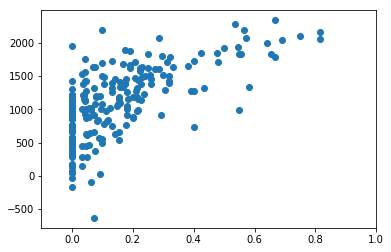

In [17]:
d1_cc = np.corrcoef(div_1['rating'], div_1['ycc_percentage'])[0,1]
print(np.corrcoef(div_1['rating'], div_1['ycc_years'])[0,1])
print(np.corrcoef(div_1['rank'], div_1['ycc_percentage'])[0,1])
print(np.corrcoef(div_1['rank'], div_1['ycc_years'])[0,1])


print(d1_cc)
print('r-squared value is:', d1_cc**2)
plt.scatter(div_1['ycc_percentage'], div_1['rating'])
plt.xlim(left = -.1, right = 1)
plt.show()

0.2896590736181551
r-squared value is: 0.08390237892932781


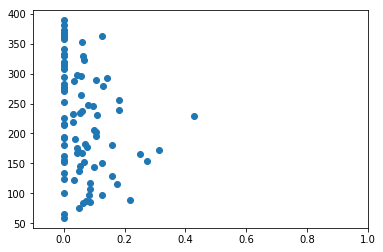

In [18]:
d3_cc = np.corrcoef(div_3['rating'], div_3['ycc_percentage'])[0,1]
# d1_cc = np.corrcoef(div_1['rank'], div_1['ycc_percentage'])[0,1]
# d1_cc = np.corrcoef(div_1['rank'], div_1['ycc_percentage'])[0,1]

print(d3_cc)
print('r-squared value is:', d3_cc**2)
plt.scatter(div_3['ycc_percentage'], div_3['rank'])
plt.xlim(left = -.1, right = 1)
plt.show()

0.35278213953684256
r-squared value is: 0.12445523797619226


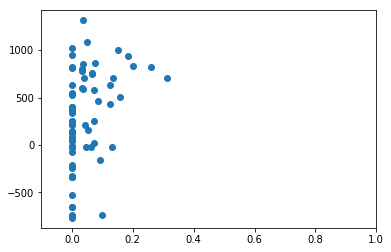

In [19]:
dev_cc = np.corrcoef(dev['rating'], dev['ycc_percentage'])[0,1]
# d1_cc = np.corrcoef(div_1['rank'], div_1['ycc_percentage'])[0,1]
# d1_cc = np.corrcoef(div_1['rank'], div_1['ycc_percentage'])[0,1]

print(dev_cc)
print('r-squared value is:', dev_cc**2)
plt.scatter(dev['ycc_percentage'], dev['rating'])
plt.xlim(left = -.1, right = 1)
plt.show()

0.5555869114703837


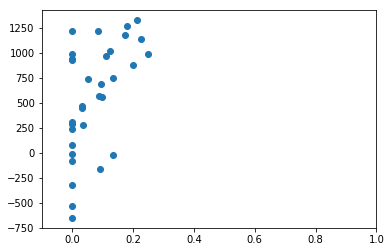

In [20]:
metro_east = ycc_df[ycc_df['region'] == 'Metro East']
me_cc = np.corrcoef(metro_east['rating'], metro_east['ycc_percentage'])[0,1]
print(me_cc)
plt.scatter(metro_east['ycc_percentage'], metro_east['rating'])
plt.xlim(left = -.1, right = 1)
plt.show()

In [21]:
total_ycc_me = 0
total_p_me = 0
me_d1 = metro_east[metro_east['division'] == 'Division I']
for x in me_d1['num_ycc']:
    total_ycc_me += x
for y in me_d1['num_total']:
    total_p_me += y
print(total_ycc_me/total_p_me)


0.08857142857142856


In [22]:
not_me_d1 = div_1[div_1['region'] != "Metro East"]

In [23]:
total_ycc_not_me = 0
total_p_not_me = 0
for x in not_me_d1['num_ycc']:
    total_ycc_not_me += x
for y in not_me_d1['num_total']:
    total_p_not_me += y
print(total_ycc_not_me/total_p_not_me)

0.17740833523115462


In [24]:
for region in div_1['region'].unique():
    temp_df = div_1[div_1['region'] == region]
    total_ycc = 0
    total = 0
    for x in temp_df['num_ycc']:
        total_ycc += x
    for y in temp_df['num_total']:
        total += y
    temp_cc = np.corrcoef(temp_df['rating'], temp_df['ycc_percentage'])[0,1]
    print(region, 'ycc percentage:', total_ycc/total, 'number of total players:',total)
    print(temp_cc)


Atlantic Coast ycc percentage: 0.18798151001540833 number of total players: 649
0.6859914207487605
Northwest ycc percentage: 0.19221967963386727 number of total players: 437
0.6049670285838447
Southwest ycc percentage: 0.09161490683229814 number of total players: 644
0.6515284822341485
South Central ycc percentage: 0.15571428571428572 number of total players: 700
0.7821211181663869
Ohio Valley ycc percentage: 0.19718309859154928 number of total players: 497
0.731677692674102
New England ycc percentage: 0.27835051546391754 number of total players: 291
0.7427017253861424
North Central ycc percentage: 0.31343283582089554 number of total players: 268
0.7788786216227931
Great Lakes ycc percentage: 0.20860927152317882 number of total players: 302
0.5445127050790189
Southeast ycc percentage: 0.1310116086235489 number of total players: 603
0.6490932832138449
Metro East ycc percentage: 0.08857142857142856 number of total players: 350
0.43459942969220583


In [25]:
import ast
loc_freq = {}
for locations in ycc_df['ycc_locations']:
    if locations != []:
        for location in ast.literal_eval(locations):
            if location in loc_freq.keys():
                loc_freq[location] += 1
            else:
                loc_freq[location] = 1
loc_freq

{'Atlanta, Georgia': 62,
 'Charlotte, North Carolina': 17,
 'Triangle, North Carolina': 22,
 'Washington, District of Columbia': 56,
 'Raleigh/Durham/Chapel Hill, North Carolina': 41,
 'Seattle, Washington': 64,
 'San Diego, California': 12,
 'San Francisco Bay Area, California': 56,
 'Boston, Massachusetts': 40,
 'Salt Lake City, Utah': 11,
 'Spearfish, South Dakota': 3,
 'Nashville, Tennessee': 8,
 'Philadelphia, Pennsylvania': 37,
 'Denver/Boulder, Colorado': 14,
 'Twin Cities, Minnesota': 43,
 'Westfield, New Jersey': 49,
 'Golden, Colorado': 7,
 'Dallas, Texas': 28,
 'Denver, Colorado': 16,
 'Portland, Maine': 27,
 'Bend, Oregon': 7,
 'Corvallis, Oregon': 11,
 'Naperville, Illinois': 17,
 'Cincinnati, Ohio': 32,
 'Hartford, Connecticut': 12,
 'Dundee, IL , Illinois': 2,
 'Albany, New York': 5,
 'Various, Massachusetts': 2,
 'Brooklyn, New York': 20,
 'Chicago, Illinois': 22,
 'Pittsburgh, Pennsylvania': 24,
 'Montpelier, Vermont': 7,
 'Madison, Wisconsin': 16,
 'New York, New York

In [26]:
state_freq = {}
for key in loc_freq.keys():
    state = key.split(',')[1].strip()
    if state in state_freq.keys():
        state_freq[state] += loc_freq[key]
    else:
        state_freq[state] = loc_freq[key]
state_freq

{'Georgia': 62,
 'North Carolina': 89,
 'District of Columbia': 58,
 'Washington': 64,
 'California': 68,
 'Massachusetts': 52,
 'Utah': 11,
 'South Dakota': 3,
 'Tennessee': 22,
 'Pennsylvania': 61,
 'Colorado': 37,
 'Minnesota': 47,
 'New Jersey': 49,
 'Texas': 62,
 'Maine': 27,
 'Oregon': 20,
 'Illinois': 44,
 'Ohio': 40,
 'Connecticut': 18,
 'IL': 2,
 'New York': 47,
 'Vermont': 10,
 'Wisconsin': 16,
 'Michigan': 12,
 'New Hampshire': 5,
 'Missouri': 20,
 'Indiana': 17,
 'Iowa': 14,
 'Kentucky': 4}

In [27]:
ycc_data = pd.read_csv('cleaned_ycc_names.csv', names = ['name', 'state'])
ycc_data.head()

,name,state
0,hazel ostrowski,Washington
1,angelina jeantette-coca,Washington
2,sophia palmer,Washington
3,alex nelson,Washington
4,brian (dominic) jacobs,Washington


In [28]:
def after_spaces(string):
    found_space = False
    prev_space = False
    spaces_done = False
    x = 0
    while spaces_done == False:
        if found_space:
            prev_space = True
        if string[x] == ' ':
            found_space = True
        else:
            found_space = False
        if prev_space == True and found_space == False:
            spaces_done = True
        x += 1
    return x-1        

list_of_names = []
col_states = []
ycc_states = []
        
for index, row in ycc_df.iterrows():
    col_state = row['state']
    for name in ast.literal_eval(row['ycc_names']):
        g = ycc_data.loc[ycc_data['name'] == name]
        unfiltered_state = str(g['state'])
        state_index = after_spaces(unfiltered_state)
        state = unfiltered_state[state_index:]
        ycc_state = state.split('Name')[0][:-1]

        list_of_names.append(name)
        col_states.append(col_state)
        ycc_states.append(ycc_state)
player_loc_df = pd.DataFrame({'name': list_of_names, 'col_state': col_states, 'ycc_state': ycc_states})

In [29]:
retention = {}
for state in ycc_df['state'].unique():
    if state in retention.keys():
        pass
    else:
        retention[state] = [0,0]
for index, row in player_loc_df.iterrows():
    if row['col_state'] == row['ycc_state']:
        prev = retention[row['col_state']]
        prev[0] += 1
        prev[1] += 1
        retention[row['col_state']] == prev
    else:
        prev = retention[row['col_state']]
        prev[1] += 1
        retention[row['col_state']] = prev
print(retention)


{'North Carolina': [62, 85], 'Washington': [30, 38], 'California': [41, 71], 'Utah': [9, 15], 'Colorado': [24, 55], 'Oregon': [10, 28], 'Ohio': [27, 45], 'Massachusetts': [17, 54], 'Pennsylvania': [36, 78], 'Minnesota': [16, 50], 'British Columbia CA': [0, 0], 'Rhode Island': [0, 12], 'Michigan': [9, 15], 'Georgia': [39, 45], 'Virginia': [0, 38], 'Vermont': [3, 21], 'South Carolina': [0, 3], 'Wisconsin': [6, 19], 'Texas': [36, 44], 'New Hampshire': [1, 3], 'Illinois': [13, 24], 'Oklahoma': [0, 12], 'Alabama': [0, 13], 'Indiana': [12, 26], 'Arizona': [0, 2], 'Louisiana': [0, 10], 'Tennessee': [15, 17], 'Florida': [0, 5], 'Missouri': [8, 15], 'District of Columbia': [1, 9], 'Montana': [0, 8], 'Kentucky': [2, 7], 'Nevada': [0, 1], 'Iowa': [12, 35], 'New York': [14, 39], 'Connecticut': [2, 9], 'Kansas': [0, 1], 'New Jersey': [3, 4], 'Maryland': [0, 10], 'Delaware': [0, 3], 'Mississippi': [0, 0], 'Nebraska': [0, 1], 'Arkansas': [0, 2], 'New Mexico': [0, 1], 'Maine': [6, 8], 'Idaho': [0, 0],

In [30]:
for name in list_of_names:
    g = ycc_data.loc[ycc_data['name'] == name]
    print(g)

            name    state
879  ben dameron  Georgia
                name           state
1091  jayden feagans  North Carolina
                 name           state
2491  mukil guruparan  North Carolina
                name                 state
2442  anders juengst  District of Columbia
          name           state
2280  seth lee  North Carolina
           name           state
1602  andrew li  North Carolina
             name           state
3456  elijah long  North Carolina
                name           state
2991  suraj madiraju  North Carolina
              name           state
799  jason manning  North Carolina
            name       state
3595  kai marcus  Washington
              name           state
794  jack mccleary  North Carolina
                name           state
2271  john mcdonnell  North Carolina
                 name                 state
828  matthew mcknight  District of Columbia
              name           state
810  kevin pignone  North Carolina
            na

2344  kevin tsui  New Jersey
            name    state
3657  leo warren  Georgia
                name         state
3472  noah weintraub  Pennsylvania
                name       state
1685  alexander yang  New Jersey
               name       state
971  tristan yarter  New Jersey
                name  state
2593  elijah babcock  Maine
                  name    state
3149  stanley birdsong  Georgia
                  name           state
3004  ethan bloodworth  North Carolina
            name    state
3150  noah cohen  Georgia
          name                 state
824  jace dean  District of Columbia
              name   state
68  michael dreger  Oregon
              name     state
1022  horace fusco  New York
             name      state
1805  noah hanson  Minnesota
           name         state
174  tim jensen  Pennsylvania
              name          state
3992  jared kannel  Massachusetts
               name           state
3000  dillon lanier  North Carolina
                   name  

1604  john laney  North Carolina
             name           state
2277  michael lee  North Carolina
                  name          state
2298  alexander lerner  Massachusetts
              name         state
2549  trevor lynch  Pennsylvania
                name           state
1100  suhas madiraju  North Carolina
             name           state
3001  sean murray  North Carolina
                 name           state
1896  phillip sellers  North Carolina
                 name                 state
2678  hunter shumaker  District of Columbia
                  name           state
3002  austin von alten  North Carolina
                 name           state
1836  hiatt von alten  North Carolina
                    name    state
1639  hayden austin-knab  Georgia
            name    state
3656  mason cary  Georgia
              name          state
2929  matthew cook  Massachusetts
                 name    state
889  matthew davidorf  Georgia
                   name    state
2302  drew di 

1743  wiro wink  Washington
               name     state
1801  dylan doherty  Missouri
             name     state
1792  devin kelly  Missouri
            name     state
2579  grant kern  Illinois
              name state
2942  landon sagle  Ohio
                 name     state
2369  josh van cleave  Illinois
              name           state
1900  addison wirt  North Carolina
            name state
838  brock hyatt  Utah
                name state
2807  garrett martin  Utah
                name state
1773  anthony mounga  Utah
            name state
2510  ryan bills  Utah
               name state
839  ashton mcmahon  Utah
              name state
855  nathan taylor  Utah
               name           state
1832  jackson amigh  North Carolina
                name state
1411  jacob anthuvan  Ohio
               name     state
1153  matthew capps  Missouri
              name          state
1659  zach jaromin  Massachusetts
              name    state
3189  zack veldman  Indiana
      

1093  damian delgado  North Carolina
              name           state
1109  chris rogich  North Carolina
             name       state
2502  kevin zhang  California
                 name     state
278  christopher chan  New York
                 name     state
3041  maximilian kong  New York
               name  state
2601  reed lonsdale  Maine
                name         state
2855  david maniloff  Pennsylvania
                 name       state
2471  maxwell tomsick  California
            name     state
267  thomas zhao  New York
               name         state
1760  shane donaher  Pennsylvania
                     name       state
2875  michael dzelzgalvis  New Jersey
               name         state
3207  lawson fisher  Pennsylvania
                name         state
1757  zach laubscher  Pennsylvania
          name         state
1982  boris li  Pennsylvania
            name         state
2556  casey mann  Pennsylvania
                    name     state
1161  christian piccio

               name       state
921  zachary rosner  California
             name  state
2587  dex dremann  Maine
            name     state
382  brian hough  Michigan
                name     state
1444  neil proefrock  Michigan
                   name     state
2751  matthew littleton  New York
               name                 state
1749  sam markowitz  District of Columbia
                   name           state
3117  jonathan phillips  North Carolina
            name      state
2174  peter rock  Minnesota
            name           state
3008  ethan cole  North Carolina
             name           state
1835  roy farrell  North Carolina
                name     state
1888  paul ikenberry  Colorado
                 name           state
2286  wilson matthews  North Carolina
              name           state
2274  dean merritt  North Carolina
               name           state
1610  collin wilkes  North Carolina
                  name         state
2919  branham channell  Pennsyl

               name  state
2630  elliott moore  Texas
                   name     state
2622  brendan flannagan  Michigan
                   name    state
2198  mitchell anderson  Indiana
              name       state
3849  caleb krantz  Washington
                 name  state
2234  manuel baptista  Maine
               name  state
3293  jared dewolfe  Maine
             name  state
1135  aidan hayes  Maine
            name  state
1140  cole moore  Maine
                       name  state
3235  john (jack) odonoghue  Maine
              name  state
2016  davis ritger  Maine
           name     state
279  sam harris  New York
               name      state
1668  john graumann  Tennessee
             name      state
3080  joe lagorio  Minnesota
             name     state
1085  ethan smith  Illinois
                name      state
2558  eric volkmeier  Minnesota
              name     state
1634  michael chen  New York
            name       state
3439  weslly pan  New Jersey
          

In [34]:
print(data['ycc_percentage'].mean())
print(data['ycc_percentage'].median())
print(div_1['ycc_percentage'].mean())
print(div_1['ycc_percentage'].median())


0.10822327421159429
0.05263157894736842
0.15489611180696913
0.1
